## PAN Card Security and Tampering Detection

#### The goal of this project is to detect tampering of PAN cards using computer vision techniques. By leveraging advanced image processing, this project will assist organizations in verifying the authenticity of PAN cards provided by their employees, customers, or other individuals. It aims to identify alterations or fraudulent modifications, ensuring that only genuine identification cards are accepted.

#### For this project, we will assess the structural similarity between the original PAN card and the PAN card uploaded by the user.

In [ ]:
# Import necessary libraries
from skimage.metrics import structural_similarity as ssim
import cv2
import imutils
from PIL import Image
import requests


__1.skimage.metrics.structural_similarity (or ssim):__

This function is used to compute the Structural Similarity Index (SSIM) between two images. SSIM is a method used to measure the similarity between two images, often used to compare the quality of an image after processing, such as detecting tampering or compression artifacts.

__2.cv2 (OpenCV):__

OpenCV (Open Source Computer Vision Library) is a widely-used library for image processing and computer vision tasks. It provides tools for reading, writing, and manipulating images and videos, and for performing various image analysis techniques like edge detection, transformations, object recognition, and more.

__3.imutils:__

imutils is a library designed to make basic image processing tasks easier. It provides simple utilities for resizing, rotating, and transforming images, which can be particularly helpful when working with OpenCV in Python.

__4.PIL (Pillow):__

Pillow is a Python Imaging Library (PIL) fork. It is used for opening, manipulating, and saving many different image file formats. In your code, it likely helps in opening image files for processing and manipulation.

__5.requests:__

requests is a popular library for making HTTP requests. In your context, it might be used to download an image from a URL, enabling you to process images that are fetched from the web.


Together, these libraries form a powerful set of tools for processing and comparing images, particularly useful for tasks like detecting tampering or verifying image authenticity.

In [ ]:
# Create the main directory and subdirectories
!mkdir -p pan_card_tampering/image


!mkdir -p

ensures that the parent directory is created if it doesn't already exist.

This will prevent errors if the pan_card_tampering folder already exists.
The image folder is created as a subfolder within pan_card_tampering.


In [ ]:
# Open images from URLs and display
original_url = 'https://www.thestatesman.com/wp-content/uploads/2019/07/pan-card.jpg'
tampered_url = 'https://assets1.cleartax-cdn.com/s/img/20170526124335/Pan4.png'

# Load images using requests and PIL
original = Image.open(requests.get(original_url, stream=True).raw)
tampered = Image.open(requests.get(tampered_url, stream=True).raw)

# Display the images (optional)
original.show()
tampered.show()


1. URL Variables: Defined original_url and tampered_url for better code readability.
2. Image Loading: Used requests.get(..., stream=True).raw to fetch and open the images directly from the URLs using Pillow (Image.open).
3. Display Images: Used show() to display the images.

#### Loading the original image and the user-provided image.

In [ ]:
# Display the file format and image size for both the original and tampered images
print(f"Original image format: {original.format}")
print(f"Tampered image format: {tampered.format}")

print(f"Original image size (width x height): {original.size}")
print(f"Tampered image size (width x height): {tampered.size}")


Original image format: JPEG
Tampered image format: PNG
Original image size (width x height): (1200, 800)
Tampered image size (width x height): (282, 179)


#### Converting the format of the tampered image to match the format of the original image.

In [ ]:
# Resize and save the original image
original = original.resize((250, 160))
print(f"Resized original image size: {original.size}")
original.save('pan_card_tampering/image/original.png')  # Save the resized image

# Resize and save the tampered image
tampered = tampered.resize((250, 160))
print(f"Resized tampered image size: {tampered.size}")
tampered.save('pan_card_tampering/image/tampered.png')  # Save the resized image


Resized original image size: (250, 160)
Resized tampered image size: (250, 160)


####  We examined the format and dimensions of both the original and tampered images.

In [ ]:
# Change image type from PNG to JPG if needed
tampered = Image.open('pan_card_tampering/image/tampered.png')
tampered.convert('RGB').save('pan_card_tampering/image/tampered.jpg', 'JPEG')  # Convert and save as JPG
print("Tampered image successfully converted to JPG format.")


Tampered image successfully converted to JPG format.


#### Resizing both the original and tampered images to the specified dimensions

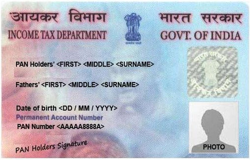

In [ ]:
# Display the original image
original

#### The original PAN card image is used as a reference for comparison.

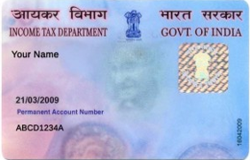

In [ ]:
# Display the user-provided image
tampered.show()
tampered

#### The user-provided image will be compared with the original PAN card image.

In [ ]:
# Load the two input images using OpenCV
original = cv2.imread('pan_card_tampering/image/original.png')  # Load the original image
tampered = cv2.imread('pan_card_tampering/image/tampered.png')  # Load the tampered image


#### Reading the images using OpenCV.

In [ ]:
# Convert the images to grayscale for comparison
original_gray = cv2.cvtColor(original, cv2.COLOR_BGR2GRAY)  # Convert the original image to grayscale
tampered_gray = cv2.cvtColor(tampered, cv2.COLOR_BGR2GRAY)  # Convert the tampered image to grayscale



Converting the images to grayscale using OpenCV. In image processing, many applications benefit from grayscale images as they simplify the analysis.

Colored images are more complex for machines to process because they have three channels (Red, Green, Blue), while grayscale images have only one channel, making them easier for algorithms to understand, especially when identifying important features or edges.

In [ ]:
from skimage.metrics import structural_similarity


In [ ]:
# Import necessary libraries
from skimage.metrics import structural_similarity
import cv2

# Convert the images to grayscale
original_gray = cv2.cvtColor(original, cv2.COLOR_BGR2GRAY)
tampered_gray = cv2.cvtColor(tampered, cv2.COLOR_BGR2GRAY)

# Compute the Structural Similarity Index (SSIM) between the two grayscale images, and return the difference image
(score, diff) = structural_similarity(original_gray, tampered_gray, full=True)

# Convert the difference image to an 8-bit unsigned integer format for visualization
diff = (diff * 255).astype("uint8")

# Print the SSIM score, which indicates the similarity between the images
print(f"SSIM: {score}")


SSIM: 0.31686135690489126


The Structural Similarity Index (SSIM) helps us identify the specific locations (in terms of x, y coordinates) where differences between two images occur. In this case, we are comparing the original and tampered images. A lower SSIM score indicates lower similarity, meaning the images differ more significantly.

In [ ]:
# Calculate the threshold and find contours
thresh = cv2.threshold(diff, 0, 255, cv2.THRESH_BINARY_INV | cv2.THRESH_OTSU)[1]

# Find contours in the thresholded image
cnts = cv2.findContours(thresh.copy(), cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

# Grab the contours in a format compatible with imutils
cnts = imutils.grab_contours(cnts)


Thresholding using the cv2.THRESH_BINARY_INV | cv2.THRESH_OTSU combination converts the grayscale image into a binary image, highlighting the differences between the original and tampered images.

The cv2.findContours function is then applied to detect the boundaries of these differences in the binary image, providing valuable information for shape analysis and recognition.

Finally, imutils.grab_contours() extracts the contours in a convenient format, making them ready for further processing and comparison.

The bounding rectangle helps in calculating the width-to-height ratio of the object’s bounding box.

We compute the bounding box for each contour and draw it on both the original and tampered images.

This highlights the regions where the two images differ, allowing us to visually identify the discrepancies.

In [ ]:
# Display the original image with contours
print('Original Image with Contours')
Image.fromarray(original).show()

Original Image with Contours


Original Format Image


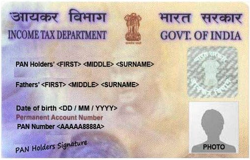

In [ ]:
#Diplay original image with contour
print('Original Format Image')
Image.fromarray(original)

Tampered Image


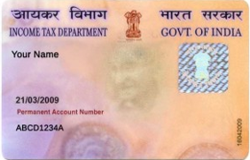

In [ ]:
#Diplay tampered image with contour
print('Tampered Image')
Image.fromarray(tampered)

Different Image


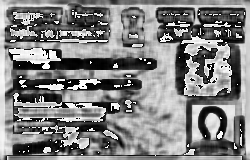

In [ ]:
#Diplay difference image with black
print('Different Image')
Image.fromarray(diff)

Threshold Image


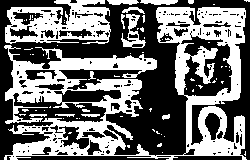

In [ ]:
#Display threshold image with white
print('Threshold Image')
Image.fromarray(thresh)

### Summary

By calculating the Structural Similarity Index (SSIM), we were able to assess the differences or similarities in the shapes of the images.

Additionally, thresholding and finding contours on the grayscale binary images facilitated shape analysis and recognition.

With an SSIM score of approximately 31.2%, we can conclude that the image provided by the user is likely fake or tampered. Finally, we visualized the differences and similarities by displaying the images with contours, differences, and threshold highlights.

### Scope

This project can be implemented in various organizations where customers or users are required to provide identification for verification.

It can help organizations determine whether the provided ID is original or tampered. Additionally, this method can be adapted for other types of identification, such as Aadhaar, voter ID, and more.